In [14]:
import pandas as pd
import numpy as np

sortedFeatureCorr = pd.read_csv("dataset/corr.csv")
data = pd.read_csv("dataset/preprocessed.csv")

In [15]:
#42 feature we have
first_feature_count =           21
last_feature_count =            20
depth   =   first_feature_count     +   last_feature_count  -1  -  (first_feature_count    +   last_feature_count)//5

In [16]:
a = sortedFeatureCorr.iloc[:, 0].values

In [17]:
for i in range(first_feature_count , sortedFeatureCorr.shape[0] - last_feature_count):
    data = data.drop(a[i], axis=1)
data=data.drop(list(data.columns)[0], axis=1)

In [18]:
data_npWNan = data.iloc[:, :].values
data_np = data_npWNan[data_npWNan[:,-1]!= -1 ]
unique_elements, counts_elements = np.unique(data_np[:,-1], return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     1      2      3      4      5]
 [ 78815  87257 136412 183844 275766]]


In [19]:
print("feature " + str(data_np.shape))

feature (762094, 41)


In [20]:
feature = data_np[:, :-1]
target = data_np[:, -1]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 0)

In [22]:
print(X_train.shape)
print(y_train.shape)

(609675, 40)
(609675,)


In [23]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
from sklearn.metrics import accuracy_score , confusion_matrix
RF_predictions  =   model.predict(X_test)
acc=accuracy_score(y_test,RF_predictions)
print(acc)

0.3917096949855333


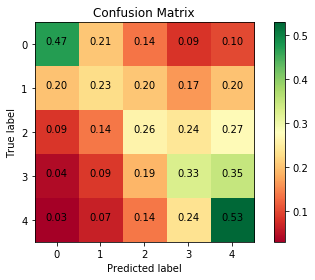

In [26]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,RF_predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest',cmap="RdYlGn")
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(5):
    for j in range(5):
        plt.text(j,i,format(cm[i][j],".2f"),horizontalalignment="center",color="black")
plt.tight_layout()
plt.show()